<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AA_Research/blob/main/corner_recognition_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Template Matching** ver. 2


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
obj = '/content/drive/My Drive/coners_4_test/game_board.jpg' # image of the game board

In [3]:
# Define the path to the template image file (corner)
tep1 = '/content/drive/My Drive/coners_4_test/template_TL.jpg'

# Define the path to the template image
tep2 = '/content/drive/My Drive/coners_4_test/template_TR.jpg'

# Define the path to the template image
tep3 = '/content/drive/My Drive/coners_4_test/template_BL.jpg'

# Define the path to the template image
tep4 = '/content/drive/My Drive/coners_4_test/template_BR.jpg'

This code reads an image and a template in grayscale, performs template matching between the image and the template, finds the locations where the template matching result is greater than or equal to a defined threshold, draws a rectangle around the matched template in the image for each location found, saves the image with the drawn rectangle, prints the last location found, calculates the central point of the top-left corner, crops the image using the top-left corner and the dimensions of the template, saves the cropped image, reads the saved image in grayscale, and displays the cropped image. The template matching method used is `cv.TM_CCOEFF_NORMED`, which is one of the six comparison methods available in OpenCV’s matchTemplate function. The threshold is set to 0.68, meaning that only the locations where the template matching result is greater than or equal to this value will be considered as matches. The rectangle is drawn using OpenCV’s rectangle function, which takes the image, the top-left corner of the rectangle, the bottom-right corner of the rectangle, and the color and thickness of the rectangle as arguments. The image is saved using OpenCV’s imwrite function, and the last location found is printed using Python’s print function. The grayscale mode in cv.imread is represented by 0. If you want to read the image in color, you can replace 0 with 1. Note that the y-coordinates come before the x-coordinates when slicing the numpy array due to numpy’s row-major order. This might be counter-intuitive if you’re used to Cartesian coordinates where the x-coordinate usually comes before the y-coordinate.

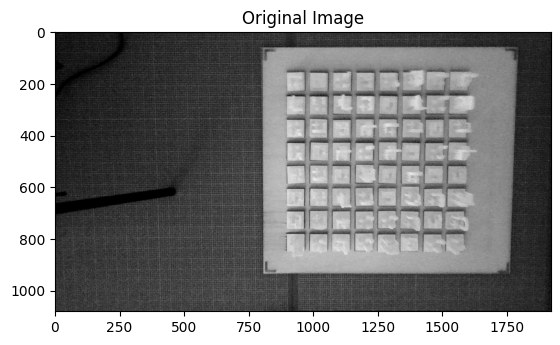

Image shape: (1080, 1920)
Locations found: (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  

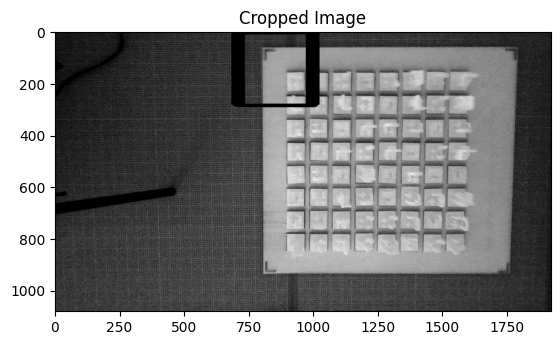

In [4]:

# Read the image file in grayscale mode (0)
img = cv.imread(obj, 0)
if img is None:
    raise FileNotFoundError(f"Image file '{obj}' not found or could not be read.")

# Display the image using matplotlib
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.show()

# Print the shape of the image (height, width)
print("Image shape:", img.shape)  # (1080, 1920) height, width

# Read the template image file in grayscale mode (0)
template = cv.imread(tep1, 0)
if template is None:
    raise FileNotFoundError(f"Template file '{tep1}' not found or could not be read.")

# Get the width (w) and height (h) of the template image
w, h = template.shape[::-1]

# Perform template matching between the image and the template
tl = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.68

# Find the locations where the template matching result is greater than or equal to the threshold
loc = np.where(tl >= threshold)

# Print the locations found
print("Locations found:", loc)

# Draw a rectangle around the matched template in the image for each location found
for pt_tl in zip(*loc[::-1]):
    cv.rectangle(img, pt_tl, (pt_tl[0] + w, pt_tl[1] + h), (0, 0, 255), 2)

# Save the image with the drawn rectangle as a .png file
cv.imwrite("tl.png", img)

# Print the last location found
print("Last location found:", pt_tl)

# Calculate the central point of the top-left corner (pt_tl)
centralpt1 = (pt_tl[0] + w / 2), (pt_tl[1] + h / 2)

# Crop the image using the top-left corner and the dimensions of the template
test_cropped = img[pt_tl[1]:pt_tl[1] + h, pt_tl[0]:pt_tl[0] + w]

# Save the cropped image as a .png file
cv.imwrite("cropped1.png", test_cropped)

# Read the saved image file in grayscale mode (0)
crop_img = cv.imread("tl.png", 0)
if crop_img is None:
    raise FileNotFoundError(f"Cropped image file 'tl.png' not found or could not be read.")

# Display the cropped image using matplotlib
plt.imshow(crop_img, cmap='gray')
plt.title("Cropped Image")
plt.show()


(1080, 1920)
(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4, 

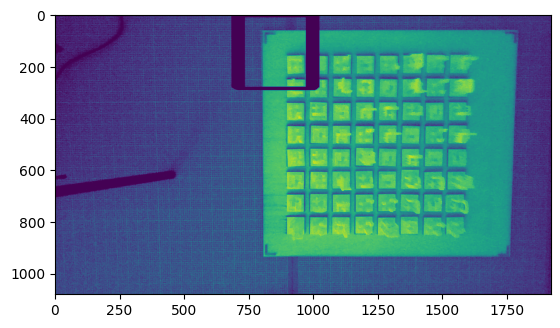

In [5]:
# Read the image file in grayscale mode (0)
img = cv.imread(obj,0)

# Display the image using matplotlib
plt.imshow(img)

# Print the shape of the image (height, width)
print(img.shape) #(1080,1920) height, width

# Read the template image file in grayscale mode (0)
template = cv.imread(tep1,0)

# Get the width (w) and height (h) of the template image
w, h = template.shape[::-1]

# Perform template matching between the image and the template
tl = cv.matchTemplate(img,template,cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.68

# Find the locations where the template matching result is greater than or equal to the threshold
loc = np.where( tl >= threshold )

# Print the locations found
print(loc)

# Draw a rectangle around the matched template in the image for each location found
for pt_tl in zip(*loc[::-1]):
    cv.rectangle(img, pt_tl, (pt_tl[0] + w, pt_tl[1] + h), (0,0,255),2)
    # Save the image with the drawn rectangle as a .png file
    cv.imwrite("tl.png" ,img)

# Print the last location found
print(pt_tl)

# Calculate the central point of the top-left corner (pt_tl)
centralpt1 = (pt_tl[0]+w/2),(pt_tl[1]+h/2)

# Crop the image using the top-left corner and the dimensions of the template
test_cropped = img[pt_tl[1]:pt_tl[1]+h,pt_tl[0]:pt_tl[0]+w]

# Save the cropped image as a .png file
cv.imwrite("cropped1.png",test_cropped)

# Read the saved image file in grayscale mode (0)
crop_img = cv.imread("tl.png",0)

# Display the cropped image using matplotlib
plt.imshow(crop_img)

This code performs template matching between a main image and a template image. It first reads the main image and the template image in grayscale. Then, it performs template matching using the method `cv.TM_CCOEFF_NORMED`. It finds the locations where the template matching result is greater than a defined threshold and draws rectangles around these locations in the main image. Finally, it saves and displays the result image. The rectangles in the result image indicate where the template was found in the main image.





(1080, 1920)
(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, 

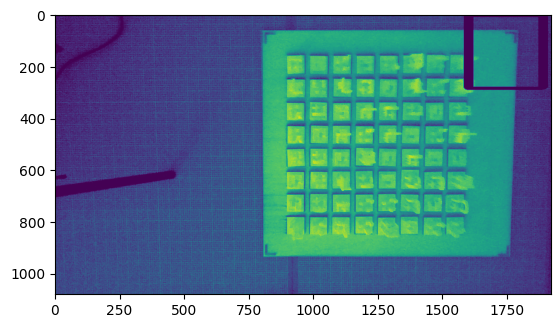

In [6]:
# Read the main image in grayscale
img = cv.imread(obj,0)

# Display the main image
plt.imshow(img)

# Print the shape of the main image (height, width)
print(img.shape)

# Read the template image in grayscale
template2 = cv.imread(tep2,0)

# Get the width and height of the template image
w2, h2 = template2.shape[::-1]

# Perform template matching between the main image and the template image
tr = cv.matchTemplate(img,template2,cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.838065

# Find the locations where the template matching result is greater than the threshold
loc = np.where( tr >= threshold )

# Print the locations
print(loc)

# Draw rectangles around the detected templates in the main image
for pt_tr in zip(*loc[::-1]):
    cv.rectangle(img, pt_tr, (pt_tr[0] + w, pt_tr[1] + h), (0,0,255),2)

# Save the result image
cv.imwrite("tr.png" ,img)

# Read the result image in grayscale
crop_img2 = cv.imread("tr.png",0)

# Display the result image
plt.imshow(crop_img2)

This code performs template matching between a main image and a template image. It first reads the main image and the template image in grayscale. Then, it performs template matching using the method `cv.TM_CCOEFF_NORMED`. It finds the locations where the template matching result is greater than a defined threshold and draws rectangles around these locations in the main image. Finally, it saves and displays the result image. The rectangles in the result image indicate where the template was found in the main image.

(1080, 1920)
(array([], dtype=int64), array([], dtype=int64))


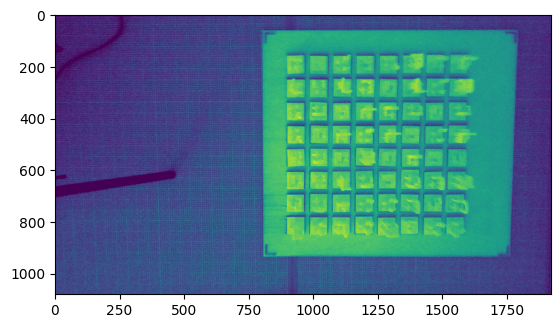

In [7]:
# Read the main image in grayscale
img = cv.imread(obj,0)

# Display the main image
plt.imshow(img)

# Print the shape of the main image (height, width)
print(img.shape)

# Read the template image in grayscale
template3 = cv.imread(tep3,0)

# Get the width and height of the template image
w3, h3 = template3.shape[::-1]

# Perform template matching between the main image and the template image
bl = cv.matchTemplate(img,template3,cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.8

# Find the locations where the template matching result is greater than the threshold
loc = np.where( bl >= threshold )

# Print the locations
print(loc)

# Draw rectangles around the detected templates in the main image
for pt_bl in zip(*loc[::-1]):
    cv.rectangle(img, pt_bl, (pt_bl[0] + w, pt_bl[1] + h), (0,0,255),2)

# Save the result image
cv.imwrite("bl.png" ,img)

# Read the result image in grayscale
crop_img3 = cv.imread("bl.png",0)

# Display the result image
plt.imshow(crop_img3)


This code performs template matching between a main image and a template image. It first reads the main image and the template image in grayscale. Then, it performs template matching using the method `cv.TM_CCOEFF_NORMED`. It finds the locations where the template matching result is greater than a defined threshold. It then creates a new location tuple with the first elements of the original location tuple and draws a rectangle around the detected template in the main image using the new location. Finally, it saves and displays the result image. The rectangle in the result image indicates where the template was found in the main image.

(1080, 1920)
(array([699, 699, 699, ..., 756, 756, 756]), array([1560, 1561, 1562, ..., 1559, 1560, 1561]))


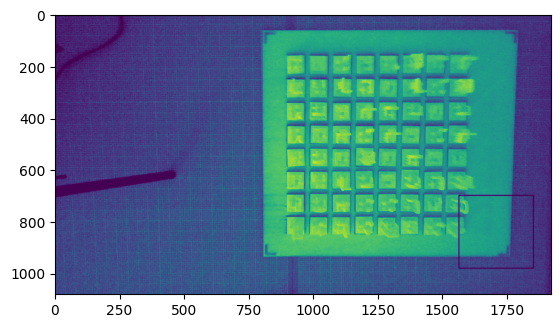

In [8]:
# Read the main image in grayscale
img = cv.imread(obj,0)

# Display the main image
plt.imshow(img)

# Print the shape of the main image (height, width)
print(img.shape)

# Read the template image in grayscale
template4 = cv.imread(tep4,0)

# Get the width and height of the template image
w4, h4 = template4.shape[::-1]

# Perform template matching between the main image and the template image
br = cv.matchTemplate(img,template4,cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.8

# Find the locations where the template matching result is greater than the threshold
loc = np.where( br >= threshold )

# Print the locations
print(loc)

# Create a new location tuple with the first elements of the original location tuple
loc_new = (loc[1][0],loc[0][0])

# Draw a rectangle around the detected template in the main image using the new location
cv.rectangle(img, loc_new, (loc_new[0] + w, loc_new[1] + h), (0,0,255),3)

# Save the result image
cv.imwrite("br.png" ,img)

# Read the result image in grayscale
crop_img4 = cv.imread("br.png",0)

# Display the result image
plt.imshow(crop_img4)


This code calculates the central points of the corners of a rectangle (in this case, an image), crops the image using these central points, saves the cropped image, reads the saved image in grayscale, and finally displays the cropped image. The central points are calculated by adding half of the width (w) to the x-coordinate and half of the height (h) to the y-coordinate of each corner. The image is cropped by slicing the numpy array representing the image using the calculated central points. The cropped image is then saved and read using OpenCV functions, and displayed using matplotlib’s imshow function. The lines calculating the central points for the top-right and bottom-left corners are commented out and can be uncommented if needed. The grayscale mode in cv.imread is represented by 0. If you want to read the image in color, you can replace 0 with 1. Note that the y-coordinates come before the x-coordinates when slicing the numpy array due to numpy’s row-major order. This might be counter-intuitive if you’re used to Cartesian coordinates where the x-coordinate usually comes before the y-coordinate.

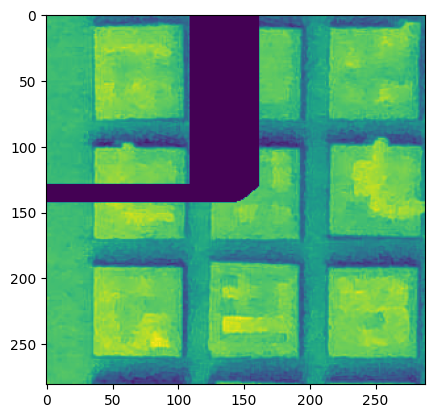

In [15]:
# Calculate the central point of the top-left corner (pt_tl)
centralpt_tl = (pt_tl[0]+w/2),(pt_tl[1]+h/2)

# Uncomment the following lines if you need to calculate the central points for other corners
# Calculate the central point of the top-right corner (pt_tr)
# centralpt_tr = (pt_tr[0]+w/2),(pt_tr[1]+h/2)

# Calculate the central point of the bottom-left corner (pt_bl)
# centralpt_bl = (pt_bl[0]+w/2),(pt_bl[1]+h/2)

# Calculate the central point of the bottom-right corner (pt_br)
centralpt_br = (pt_br[0]+w/2),(pt_br[1]+h/2)

# Crop the image using the central points of the top-left and bottom-right corners
cropped_img = img[int(pt_tl[1]+h/2) : int(pt_br[1]+h/2)  , int(pt_tl[0]+w/2) : int(pt_br[0]+w/2)]

# Save the cropped image as a .png file
cv.imwrite("cropped_img.png",cropped_img)

# Read the saved image file in grayscale mode (0)
crop_img = cv.imread("cropped_img.png",0)

# Display the cropped image using matplotlib
plt.imshow(crop_img)


This code reads an image and a template in grayscale, performs template matching between the image and the template, finds the locations where the template matching result is greater than or equal to a defined threshold, draws a rectangle around the matched template in the image for each location found, saves the image with the drawn rectangle, and prints the last location found. The template matching method used is `cv.TM_CCOEFF_NORMED`, which is one of the six comparison methods available in OpenCV’s matchTemplate function. The threshold is set to 0.838065, meaning that only the locations where the template matching result is greater than or equal to this value will be considered as matches. The rectangle is drawn using OpenCV’s rectangle function, which takes the image, the top-left corner of the rectangle, the bottom-right corner of the rectangle, and the color and thickness of the rectangle as arguments. The image is saved using OpenCV’s imwrite function, and the last location found is printed using Python’s print function. The lines drawing the rectangle around the matched template in the image for the top-right and bottom-left corners are commented out and can be uncommented if needed.

(1080, 1920)
(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, 

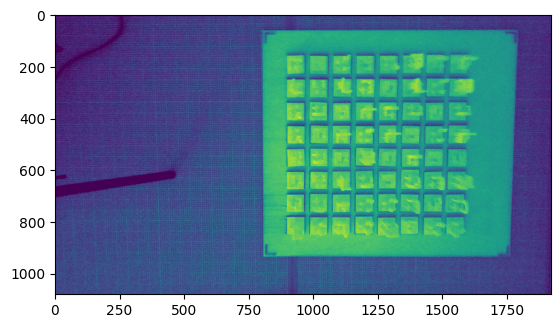

In [16]:
# Read the image file in grayscale mode (0)
img = cv.imread(obj, 0)

# Display the image using matplotlib
plt.imshow(img)

# Print the shape of the image (height, width)
print(img.shape) #(1080,1920) height, width

# Read the template image file in grayscale mode (0)
template2 = cv.imread(tep2, 0)

# Get the width (w2) and height (h2) of the template image
w2, h2 = template2.shape[::-1]

# Perform template matching between the image and the template
res2 = cv.matchTemplate(img,template2,cv.TM_CCOEFF_NORMED)

# Define the threshold for the template matching result
threshold = 0.838065

# Find the locations where the template matching result is greater than or equal to the threshold
loc = np.where( res2 >= threshold )
print(loc)

# Draw a rectangle around the matched template in the image for each location found
for pt in zip(*loc[::-1]):
    cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255),2)
    #cv.rectangle(img, pt, (pt[0] + w2, pt[1] + h2), (0,0,255),2)
    # Save the image with the drawn rectangle as a .png file
    cv.imwrite("res7.png" ,img)

# Print the last location found
print(pt)


This code reads an image and a template in grayscale, displays the image, gets the pixel value at a specific coordinate in the image, prints the pixel value, and displays the pixel value as an image. The pixel value is obtained by indexing the numpy array representing the image with the coordinate. The pixel value is then displayed as an image by creating a 2D numpy array with the pixel value as the only element and passing this array to matplotlib’s imshow function. Note that the coordinate is in (row, column) format, which corresponds to (y, x) in Cartesian coordinates. This might be counter-intuitive if you’re used to Cartesian coordinates where the x-coordinate usually comes before the y-coordinate.

11


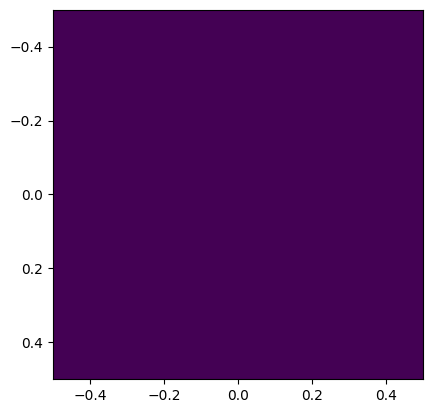

In [18]:
# Read the image file in grayscale mode (0)
img3 = cv.imread(obj, 0)

# Display the image using matplotlib
plt.imshow(img3)

# Get the pixel value at the coordinate (50, 100) in the image
px= img3[50, 100]

# Print the pixel value
print(px)

# Display the pixel value as an image using matplotlib
# Note: This will display a single color corresponding to the pixel value
plt.imshow([[px]])